In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raisin-dataset/Raisin_Dataset.xlsx
/kaggle/input/raisin-dataset/Raisin_Dataset.txt
/kaggle/input/raisin-dataset/Raisin_Dataset.arff


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
df=pd.read_excel('/kaggle/input/raisin-dataset/Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


# EDA

In [4]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [6]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


<AxesSubplot:>

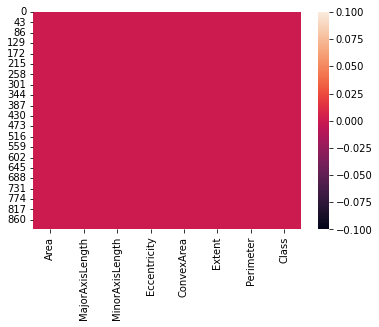

In [7]:
sns.heatmap(df.isna())

<AxesSubplot:>

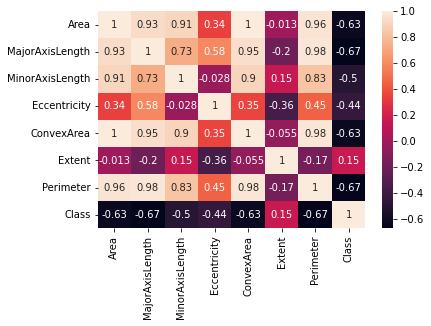

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [10]:
sc=StandardScaler()
X=sc.fit_transform(df[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Extent','Perimeter']])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

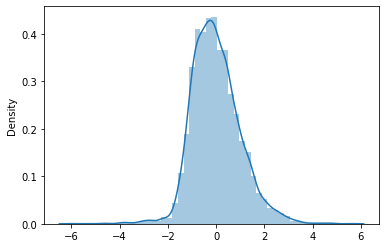

In [11]:
sns.distplot(X)

In [12]:
X

array([[-0.00718637,  0.09757695, -0.02395819, ..., -0.01570903,
         1.10674264,  0.06627397],
       [-0.32421719, -0.20901207, -0.22929222, ..., -0.3042482 ,
        -0.28777679, -0.16125245],
       [ 0.07829241,  0.09775835,  0.23698797, ...,  0.06211335,
        -1.15824974,  0.15594468],
       ...,
       [ 0.30407232,  0.00670023,  0.88767401, ...,  0.37004063,
         0.77828911,  0.46387322],
       [ 0.14671134,  0.39160036, -0.00624644, ...,  0.15871029,
        -0.76180437,  0.3385864 ],
       [-0.05631357,  0.69976181, -0.78493347, ..., -0.04881606,
        -1.26290931,  0.39090133]])

In [13]:
Y=df['Class']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

# Model Building

In [15]:
def predict(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    trainac=model.score(x_train,y_train)
    testac=model.score(x_test,y_test)
    
    print(f"Training Accuracy {trainac}\nTesting Accuracy {testac}")

# Testing of Model

In [16]:
XX_test=pd.DataFrame({'Area':87524,'MijorAxisLength':442.246011,'MinorAxisLength':253.291155,'Eccentricity':0.819738,'ConvexArea':90546,'Extent':0.758651,'Perimeter':1184.040},index=[0])

In [17]:
XX_test

,Area,MijorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.04


In [18]:
model=XGBClassifier(max_depth=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
trainac=model.score(x_train,y_train)
testac=model.score(x_test,y_test)
print(f"Training Accuracy {trainac}\nTesting Accuracy {testac}")

Training Accuracy 0.9511111111111111
Testing Accuracy 0.8888888888888888


In [19]:
y_pred=model.predict(XX_test)
y_pred

array([0])